In [40]:
from keras.datasets import mnist
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()




data type  uint8
dimesion  3
shape  (60000, 28, 28)


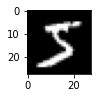

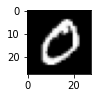

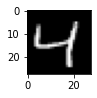

In [41]:
train_images.shape
# print(train_image)
#it’s an array of 60,000 matrices of 28 × 8 integers.
print("data type ",train_images.dtype)
print("dimesion ",train_images.ndim)
print("shape ",train_images.shape)

for i in range(3):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

(90, 28, 28)


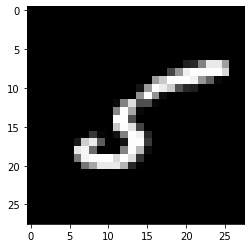

In [42]:
slicing=train_images[10:100,0:28,0:28]
print(slicing.shape)
pyplot.imshow(slicing[1], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [43]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:

test_images.shape


(10000, 28, 28)

In [45]:
network=models.Sequential()
#in back what actually relu functio do?
# output = relu(dot(W, input) + b)
#check the naive_relu fn
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
x=network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation="relu"))
#In this expression, W and b are tensors that are attributes of the layer. They’re called
#the weights or trainable parameters of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the network from exposure
#to training data.
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [46]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
#reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our train-
#ing images, for instance, were stored in an array of shape (60000, 28, 28) of type
#int8 with values in the [0, 255] interval.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [48]:
#Converts a class vector (integers) to binary class matrix.
print(train_labels.shape)
train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)
print("after")
print(train_labels.shape)

(60000,)
after
(60000, 10)


In [49]:

network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: nan - accuracy: 0.1072
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.0987
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.0987
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: nan - accuracy: 0.0987


In [50]:
test_loss,test_accu=network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0980


In [51]:
print("test accuracy is =",test_accu)

test accuracy is = 0.09799999743700027


In [52]:
#Relu activation function 
# element wise operation
def naive_relu(x):
  assert len(x.shape)==2
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]=max(x[i,j],0)
  return x